iDEA.methods.interacting.solve: solving eigenproblem...
done


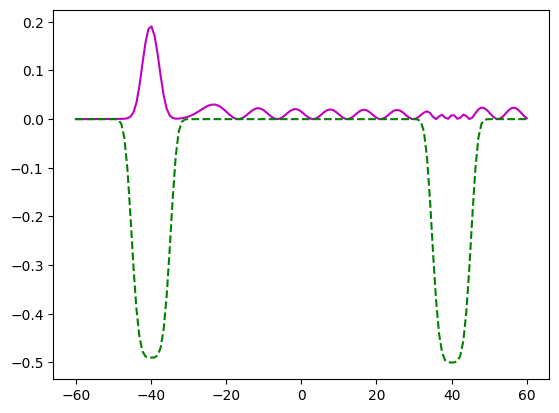

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA as idea

#This program will iterate through excited states till it finds a state where both electrons are in their first excited state.

#Parameters
potential = "testpotential" #Potential that sam used, double electron excition is k=38


#Define the system
if potential == "testpotential":
    x = np.linspace(-60,60,150)
    v_ext = -0.49*np.exp(-1e-3*(x+40)**4) -0.5*np.exp(-1e-3*(x-40)**4)
elif potential == "gaussian":
    x = np.linspace(-30,30,150)
    v_ext = -2*np.exp(-((x-20)**2)/10) - 2.005*np.exp(-((x+20)**2)/10)

v_int = idea.interactions.softened_interaction(x)
system = idea.system.System(x,v_ext,v_int,electrons="uu")

#solve
teststate = idea.methods.interacting.solve(system, k=32)
density = idea.observables.density(system, state=teststate)
print("done")
plt.plot(system.x, density, "-m")
plt.plot(system.x, v_ext, "--g")
plt.show()


In [13]:
import scipy as sp

#function to determine if a density contains two electons, each in their first state.
def isdoubleexcitation (density):

    #find peaks in the density which are more than half the height of the maximum.
    density_peaks = sp.signal.find_peaks(density, height = 0.01)
    print(density_peaks)
    #if there are 4 peaks then continue, otherwise return false
    if len(density_peaks) != 4:
        return False
    else:
        #if the peaks are grouped into sets of 2 then return true, otherwise return false
        if abs(x[peaks[0]]-x[peaks[1]]) < 10 and abs(x[peaks[2]]-x[peaks[3]]) < 10:
            return True
        else:
            return False


In [14]:
print(isdoubleexcitation(density))


(array([  5,  37,  51,  64,  79,  97, 124]), {'peak_heights': array([0.01027348, 0.02265845, 0.02320238, 0.02448189, 0.02681562,
       0.03613199, 0.19130181])})
False
